# Notebook Team 7

In this notebook, we will use a CNN fusionned by MobileNet architecture model to classify the images, following the approach used in the first notebook.

### All module needed

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical, register_keras_serializable
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense


2025-04-10 08:34:21.444450: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-10 08:34:21.449599: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-10 08:34:21.466282: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-10 08:34:21.493067: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-10 08:34:21.500676: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-10 08:34:21.520557: I tensorflow/core/platform/cpu_feature_gu

### Define the modele architecture 

In [2]:
model = Sequential([
    Conv2D(8, (3, 3), strides=2, padding='same', input_shape=(224, 224, 3)),
    BatchNormalization(),
    Activation('relu'),

    DepthwiseConv2D(3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(16, (1, 1)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    DepthwiseConv2D(3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(32, (1, 1)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    DepthwiseConv2D(3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(64, (1, 1)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    GlobalAveragePooling2D(),
    Dense(5, activation='softmax')

])

/shared/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### showing the modele

In [5]:
model.summary()

NameError: name 'model' is not defined

### Reading the data

First, we’ll load the saved image and label data from the NumPy files.

In [4]:
import numpy as np  # Importing NumPy for numerical operations and array handling

# Load the images and labels back from the saved NumPy files
train_images = np.load('data/train_images.npy')  # Load image training data
train_labels = np.load('data/train_labels.npy')  # Load label training data


print("Data loaded successfully from NumPy files.")

Data loaded successfully from NumPy files.


### Define the image size for preprocessing

In [5]:
IMG_SIZE = 128


In [6]:
NUM_CLASSES = len(np.unique(train_labels))

In [7]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
preprocess

In [8]:
train_images = tf.image.resize(train_images, (IMG_SIZE, IMG_SIZE)) / 255.0


In [9]:
history = model.fit(
    train_images, train_labels,
    epochs= 10,
    batch_size=64
)


Epoch 1/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.6561 - loss: 0.8992 
Epoch 2/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.9703 - loss: 0.1318
Epoch 3/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 15s 99ms/step - accuracy: 0.9795 - loss: 0.0795
Epoch 4/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 17s 109ms/step - accuracy: 0.9846 - loss: 0.0649
Epoch 5/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 21s 140ms/step - accuracy: 0.9901 - loss: 0.0388
Epoch 6/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.9961 - loss: 0.0208
Epoch 7/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.9958 - loss: 0.0197
Epoch 8/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - accuracy: 0.9963 - loss: 0.0147
Epoch 9/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 16s 107ms/step - accuracy: 0.9969 - loss: 0.0141
Epoch 10/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - accuracy: 0.9951 - loss: 0.0144


Visualizing the training curve

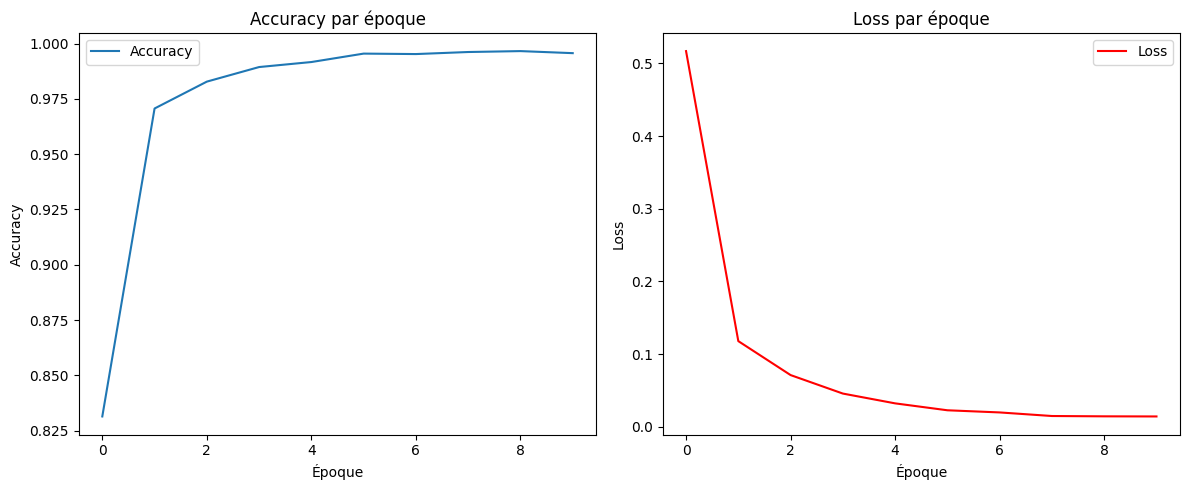

In [10]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Accuracy')
plt.title('Accuracy par époque')
plt.xlabel('Époque')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Loss', color='red')
plt.title('Loss par époque')
plt.xlabel('Époque')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


##### **Saving the model**

In [11]:
import pickle

with open('squeezLite.1.pkl', 'wb') as file:
    pickle.dump(model, file)

### Deep learning: Validation set results

In [12]:
val_images = np.load('data/val_images.npy')  # Load image val data
val_labels = np.load('data/val_labels.npy')  # Load label val data
val_labels = to_categorical(val_labels, num_classes=5)

In [13]:
with open('squeezLite.1.pkl', 'rb') as file:
    cnn_loaded_model = pickle.load(file)

val_images = tf.image.resize(val_images, (IMG_SIZE, IMG_SIZE)) / 255.0

val_predictions = cnn_loaded_model.predict(val_images)

102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step


In [14]:
from sklearn.metrics import classification_report, confusion_matrix

# Convert from one-hot or probability distributions to single integer class indices
val_predictions = np.argmax(val_predictions, axis=1) 
val_labels = np.argmax(val_labels, axis=1) 


# Detailed classification report
print("\nClassification Report:")
print(classification_report(val_labels, val_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       727
           1       1.00      1.00      1.00       222
           2       1.00      1.00      1.00       421
           3       0.99      1.00      0.99       721
           4       1.00      1.00      1.00      1146

    accuracy                           1.00      3237
   macro avg       1.00      1.00      1.00      3237
weighted avg       1.00      1.00      1.00      3237



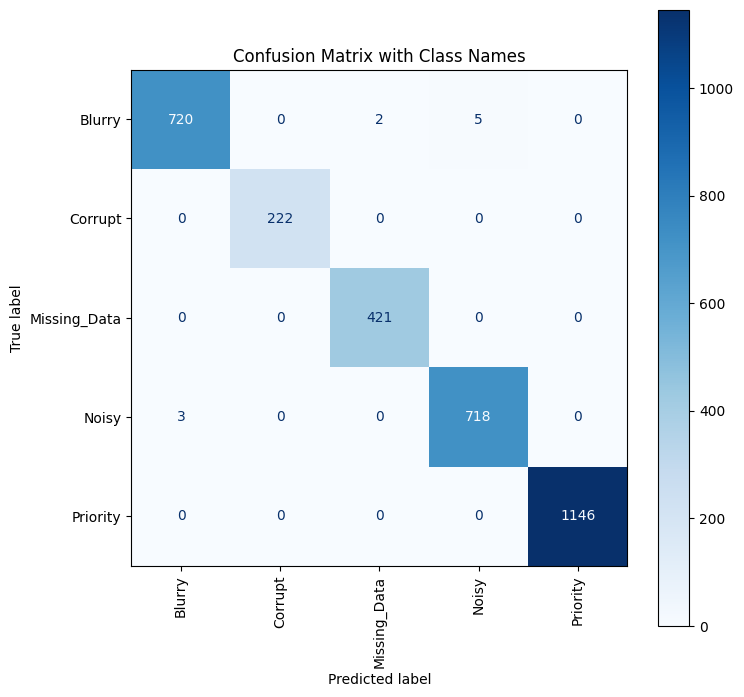

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define class names
class_names = ["Blurry", "Corrupt", "Missing_Data", "Noisy", "Priority"]

# Compute the confusion matrix
cm = confusion_matrix(val_labels, val_predictions)

# Plot the confusion matrix with class names
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Customize and display the plot
fig, ax = plt.subplots(figsize=(8, 8))  # Set the figure size
disp.plot(ax=ax, cmap='Blues', xticks_rotation='vertical')  # Use a blue colormap
plt.title("Confusion Matrix with Class Names")
plt.show()

In [16]:
import gc

# Force garbage collection to free up memory
gc.collect()

# Clear the input/output cache
print("Data and models removed from memory.")

Data and models removed from memory.


#### Import test data

In [ ]:
import numpy as np
# first let us load the testing data
test_images = np.load('data/test_images1.npy')      # Load image test data
test_labels = np.load('data/test_labels.npy')      # Load label test data

#### Import Evaluation function

In [ ]:
from source.evaluate import evaluate_pipeline # A built-in function to evaluate a given ML pipeline by preprocessing, predicting, and calculating performance metrics.

**Inputs:**
  
- **model**: The trained machine learning model to evaluate.
- **X_test_raw**: Raw test data that needs to be preprocessed before evaluation.
- **y_test**: True labels corresponding to the test data for performance comparison.
- **preprocessing_fn**: A function used to preprocess the raw test data.
    
**Outputs:**

- **metrics**: A dictionary containing various evaluation metrics like accuracy, F1 score, evaluation time, memory usage, CPU usage, and algorithm code size.
- **confusion matrix**

#### preprocessing 

In [ ]:
import tensorflow as tf
IMG_SIZE = 128

def preprocessing_fn_CNN(X): 
    return tf.image.resize(X, (IMG_SIZE, IMG_SIZE)) / 255.0


#### Import CNN model

In [ ]:
from keras.utils import to_categorical
import pickle
test_labels = to_categorical(test_labels, num_classes=5)

# Load the CNN model from the 4th notebook
with open('squeezLite.2.pkl', 'rb') as file:
    cnn_model = pickle.load(file)

#### Evaluate the CNN pipeline

In [ ]:
# Evaluate the pipeline
metrics = evaluate_pipeline(cnn_model, test_images, test_labels, preprocessing_fn_CNN)


In [ ]:
import gc

# Remove the data from memory
del cnn_model, test_images, test_labels

# Force garbage collection to free up memory
gc.collect()

# Clear the input/output cache
print("Data and models removed from memory.")